In [3]:
# http://qiita.com/shu_marubo/items/be2113d2e62410acbca1?utm_campaign=popular_items&utm_medium=feed&utm_source=popular_items

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Input, merge
import keras
from keras.utils import np_utils

# data preparation
iris = datasets.load_iris()
features = iris.data
targets = np_utils.to_categorical(iris.target)

x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size=0.7)

# model
inputs = Input(shape=(4,))

x_1 = Dense(8, activation='relu')(inputs)
x_1 = Dense(5, activation='relu')(x_1)
x_2 = Dense(7, activation='relu')(inputs)
x_2 = Dense(5, activation='relu')(x_2)

x = merge([x_1, x_2], mode='concat')
predictions = Dense(3, activation='softmax')(x)

model = Model(input=inputs, output=predictions)


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=5, epochs=100, shuffle=True,  validation_split=0.1)


Using TensorFlow backend.
/Users/ikedayutaro/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:23: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/Users/ikedayutaro/.pyenv/versions/3.6.0/lib/python3.6/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/Users/ikedayutaro/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 94 samples, validate on 11 samples
Epoch 1/100
94/94 [==============================] - 0s - loss: 3.0993 - acc: 0.3511 - val_loss: 2.7991 - val_acc: 0.3636
Epoch 2/100
94/94 [==============================] - 0s - loss: 2.7358 - acc: 0.3511 - val_loss: 2.4605 - val_acc: 0.3636
Epoch 3/100
94/94 [==============================] - 0s - loss: 2.3916 - acc: 0.3511 - val_loss: 2.1425 - val_acc: 0.3636
Epoch 4/100
94/94 [==============================] - 0s - loss: 2.0773 - acc: 0.3511 - val_loss: 1.8642 - val_acc: 0.3636

In [2]:
inputs = Input(shape=(4,))

x_1 = Dense(8, activation='relu')(inputs)
x_1 = Dense(5, activation='relu')(x_1)
x_2 = Dense(7, activation='relu')(inputs)
x_2 = Dense(5, activation='relu')(x_2)

x = merge([x_1, x_2], mode='concat')
predictions = Dense(3, activation='softmax')(x)

model = Model(input=inputs, output=predictions)

/Users/ikedayutaro/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/Users/ikedayutaro/.pyenv/versions/3.6.0/lib/python3.6/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/Users/ikedayutaro/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


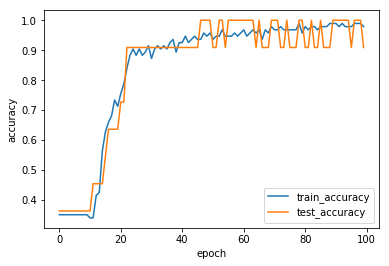

In [3]:
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)

In [4]:
def model_1(x_train, y_train, conv_num, dense_num):
    input_shape = x_train.shape[1:]

    # make teacher hot-encoded
    y_train = to_categorical(y_train, 10)

    # set model
    model = Sequential()
    model.add(Conv2D(conv_num, (3,3), activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Conv2D(conv_num, (3,3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(conv_num * 2, (3,3), activation='relu'))
    model.add(Conv2D(conv_num * 2, (3,3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(dense_num, activation='relu', W_regularizer = l1_l2(.01)))
    model.add(Dropout(0.2))
    model.add(Dense(int(dense_num * 0.6), activation='relu', W_regularizer = l1_l2(.01)))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    # training
    history =model.fit(x_train, y_train, batch_size=256, epochs=50, shuffle=True,  validation_split=0.1)
    return history
history_1 = model_1(x_train, y_train, 32, 256)
show_history(history_1)

NameError: name 'to_categorical' is not defined